In [1]:
import sys
XCr_path = '/Users/aliaksei/Downloads/lume-crystal-bpm'
sys.path.append(XCr_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from XCrystal import *
import time

In [2]:
Npoints = 50
delta_theta = 0.0
omega0 = 9000
omegas = np.linspace(8999.8, 9000.6, Npoints)  
Rs = np.zeros(Npoints)
Ts = np.zeros(Npoints)

In [3]:
def single_realization(delta_theta, omega):
    
    xcr = XCrystal(XCr_path+'/Crystal.yaml', omega)
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission

In [4]:
for i in range(0, Npoints):
    Rs[i], Ts[i] = single_realization(delta_theta, omegas[i])

Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Splitting recipe: Euler
Initialized tools...
Delta theta:  0.0 ; Reflectivity:  0.034693866328164624 ; Transmission:  0.4139124866605232
Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Splitting recipe: Euler
Initialized tools...
Delta theta:  0.0 ; Reflectivity:  0.030338496091547353 ; Transmission:  0.4195379377580391
Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Splitting recipe: Euler
Initialized tools...
Delta theta:  0.0 ; Reflectivity:  0.008801892418734289 ; Transmission:  0.43190484461924855
Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Splitting recipe: Euler
Initialized tools...
Delta theta:  0.0 ; Reflectivity:  0.034189

In [5]:
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20

In [6]:
XOPfile = 'Si4009keVThickness50um'
XOPdata = np.loadtxt(XOPfile)

Text(0, 0.5, 'R')

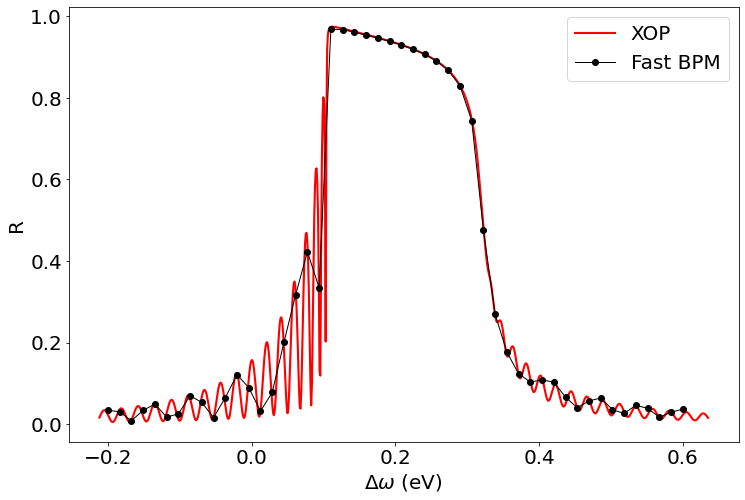

In [8]:
alphaB = 0.5320738025797507
dw = XOPdata[:,0]*4.848137 * 1e-6 * omega0 / np.tan(alphaB)

plt.plot(dw, XOPdata[:,1], '-', linewidth=2.1, color='red', label='XOP')
plt.plot(omegas - omega0, Rs, 'o-', linewidth=1.0, color='black', label='Fast BPM')

plt.legend()
plt.xlabel(r'$\Delta \omega$ (eV)')
plt.ylabel('R')